In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.linear_model import LogisticRegression

In [2]:
# File path to the CSV
file_path = 'C:\\Users\\Hasan\\Desktop\\data science folder\\data.csv'

# Load the CSV without headers
data = pd.read_csv(file_path)
print(data.head())



         TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3    TransactionId_380  BatchId_102363   AccountId_648  SubscriptionId_2185   
4  TransactionId_28195   BatchId_38780  AccountId_4841  SubscriptionId_3829   

        CustomerId CurrencyCode  CountryCode    ProviderId     ProductId  \
0  CustomerId_4406          UGX          256  ProviderId_6  ProductId_10   
1  CustomerId_4406          UGX          256  ProviderId_4   ProductId_6   
2  CustomerId_4683          UGX          256  ProviderId_6   ProductId_1   
3   CustomerId_988          UGX          256  ProviderId_1  ProductId_21   
4   CustomerId_988          UGX          256  ProviderId_4   ProductId_6   

      ProductCategory    ChannelId   Amount  Value  TransactionStart

In [3]:
# Step 1: Define Proxy Variable for Risk (FraudRate)
# Aggregating fraud rate per customer
customer_risk = data.groupby('CustomerId')['FraudResult'].mean().reset_index()
customer_risk.columns = ['CustomerId', 'CustomerFraudRate']

# Define High-Risk vs Low-Risk
threshold = 0.2  # Example threshold for fraud rate
customer_risk['RiskCategory'] = (customer_risk['CustomerFraudRate'] > threshold).astype(int)

# Merge with original data
data = data.merge(customer_risk[['CustomerId', 'RiskCategory']], on='CustomerId', how='left')

# Step 2: Select Features for Predicting Risk
# Define feature columns
categorical_features = ['ChannelId', 'ProductCategory', 'CurrencyCode', 'CountryCode']
numerical_features = ['Amount', 'Value', 'TransactionStartTime']
target = 'RiskCategory'

In [4]:
# Step 3: Train Risk Probability Model
# Splitting the data
X = data[categorical_features + numerical_features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing: OneHotEncoding for categorical and StandardScaler for numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

In [5]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report

# Assuming 'data' is your DataFrame, and 'TransactionStartTime' is a datetime column

# Ensure 'TransactionStartTime' is in datetime format
data['TransactionStartTime'] = pd.to_datetime(data['TransactionStartTime'])

# Create new features
data['TransactionHour'] = data['TransactionStartTime'].dt.hour
data['TransactionDayOfWeek'] = data['TransactionStartTime'].dt.dayofweek
data['IsWeekend'] = data['TransactionDayOfWeek'].isin([5, 6]).astype(int)  # 5 = Saturday, 6 = Sunday

# Define numerical features (after adding new columns)
numerical_features = ['Amount', 'Value', 'TransactionHour', 'TransactionDayOfWeek', 'IsWeekend']

# Define categorical features
categorical_features = ['ChannelId', 'ProductCategory', 'CurrencyCode', 'CountryCode']

# Define the target
target = 'RiskCategory'

# Splitting the data into features and target variable
X = data[categorical_features + numerical_features]
y = data[target]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Model pipeline: first preprocessing, then classifier
risk_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train the model
risk_model.fit(X_train, y_train)

# Predict probabilities and class labels on the test set
y_pred_proba = risk_model.predict_proba(X_test)[:, 1]
y_pred = risk_model.predict(X_test)

# Evaluate the model using different metrics
print(f"AUC-ROC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


AUC-ROC Score: 0.9061
Accuracy: 0.9986
Recall: 0.6136
Precision: 0.7297
F1-Score: 0.6667

Confusion Matrix:
[[19079    10]
 [   17    27]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19089
           1       0.73      0.61      0.67        44

    accuracy                           1.00     19133
   macro avg       0.86      0.81      0.83     19133
weighted avg       1.00      1.00      1.00     19133



In [6]:
# Overview of the dataset
print("Dataset Overview:")
print(f"Number of rows: {data.shape[0]}")
print(f"Number of columns: {data.shape[1]}")
print("\nData Types:")
print(data.dtypes)

# Display the first few rows
print("\nFirst 5 Rows:")
print(data.head())


Dataset Overview:
Number of rows: 95662
Number of columns: 20

Data Types:
TransactionId                        object
BatchId                              object
AccountId                            object
SubscriptionId                       object
CustomerId                           object
CurrencyCode                         object
CountryCode                           int64
ProviderId                           object
ProductId                            object
ProductCategory                      object
ChannelId                            object
Amount                              float64
Value                                 int64
TransactionStartTime    datetime64[ns, UTC]
PricingStrategy                       int64
FraudResult                           int64
RiskCategory                          int64
TransactionHour                       int32
TransactionDayOfWeek                  int32
IsWeekend                             int64
dtype: object

First 5 Rows:
         Transac

In [7]:
# Summary statistics for numerical columns
print("\nSummary Statistics (Numerical Features):")
print(data.describe())

# Summary statistics for categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
if len(categorical_columns) > 0:
    print("\nSummary Statistics (Categorical Features):")
    print(data[categorical_columns].describe())
else:
    print("\nNo categorical features detected in the dataset.")



Summary Statistics (Numerical Features):
       CountryCode        Amount         Value  PricingStrategy   FraudResult  \
count      95662.0  9.566200e+04  9.566200e+04     95662.000000  95662.000000   
mean         256.0  6.717846e+03  9.900584e+03         2.255974      0.002018   
std            0.0  1.233068e+05  1.231221e+05         0.732924      0.044872   
min          256.0 -1.000000e+06  2.000000e+00         0.000000      0.000000   
25%          256.0 -5.000000e+01  2.750000e+02         2.000000      0.000000   
50%          256.0  1.000000e+03  1.000000e+03         2.000000      0.000000   
75%          256.0  2.800000e+03  5.000000e+03         2.000000      0.000000   
max          256.0  9.880000e+06  9.880000e+06         4.000000      1.000000   

       RiskCategory  TransactionHour  TransactionDayOfWeek     IsWeekend  
count  95662.000000     95662.000000          95662.000000  95662.000000  
mean       0.002896        12.447722              3.011907      0.206864  
std

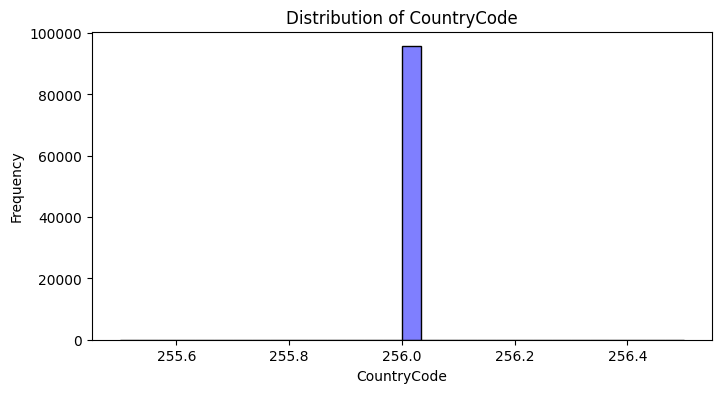

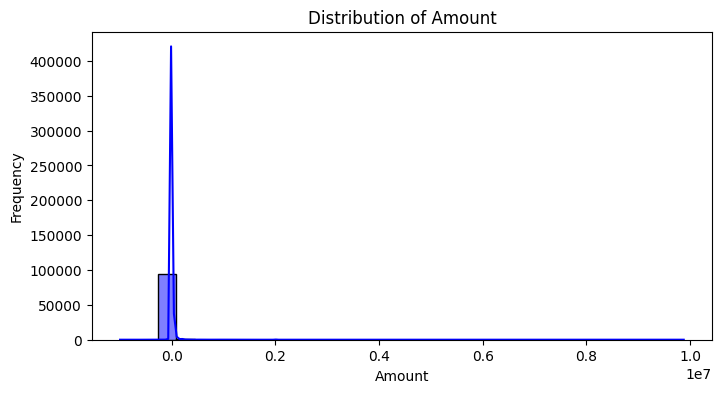

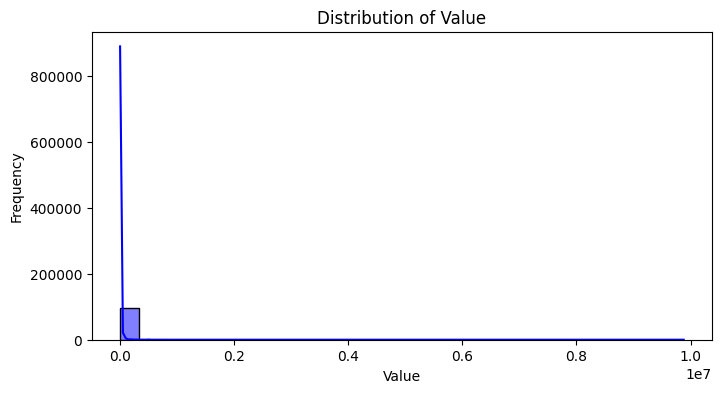

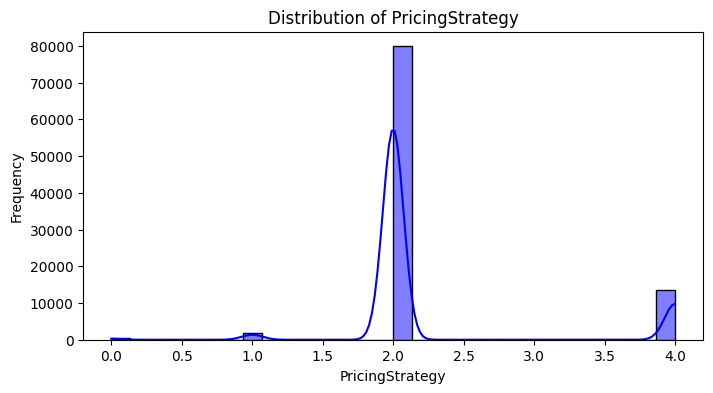

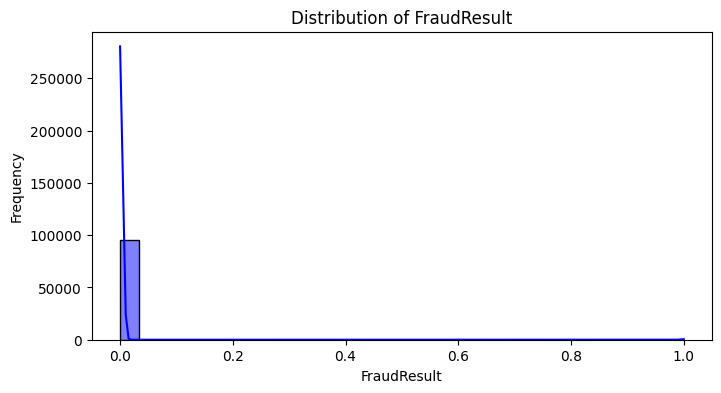

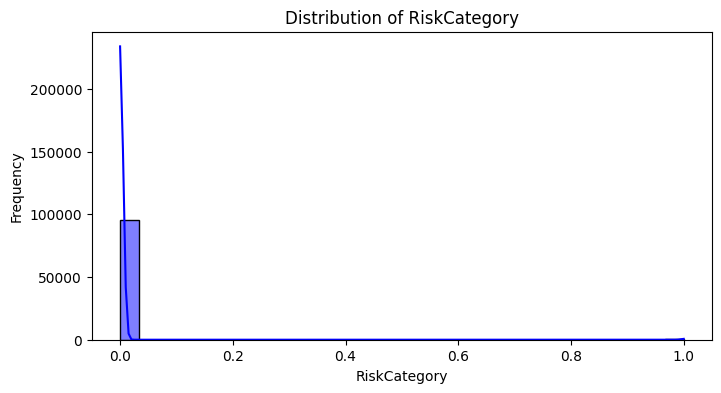

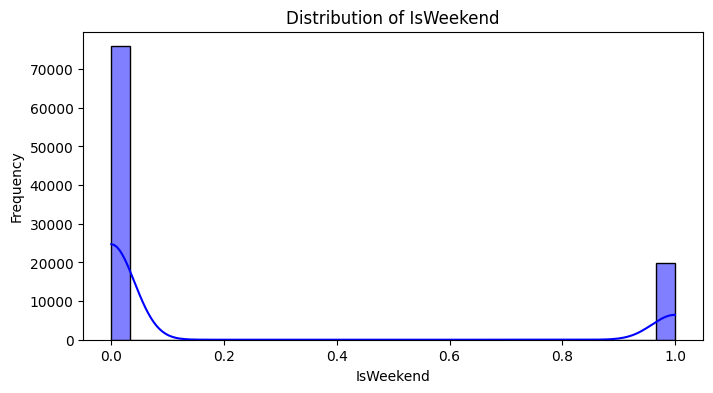

In [8]:
#Distribution of Numerical Features
import seaborn as sns
import matplotlib.pyplot as plt

# Numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Plot distributions
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


In [9]:
# Display the distribution of categorical features
for feature in categorical_features:
    print(f"\nDistribution of {feature}:")
    print(data[feature].value_counts())



Distribution of ChannelId:
ChannelId
ChannelId_3    56935
ChannelId_2    37141
ChannelId_5     1048
ChannelId_1      538
Name: count, dtype: int64

Distribution of ProductCategory:
ProductCategory
financial_services    45405
airtime               45027
utility_bill           1920
data_bundles           1613
tv                     1279
ticket                  216
movies                  175
transport                25
other                     2
Name: count, dtype: int64

Distribution of CurrencyCode:
CurrencyCode
UGX    95662
Name: count, dtype: int64

Distribution of CountryCode:
CountryCode
256    95662
Name: count, dtype: int64


C:\Users\Hasan\AppData\Local\Temp\ipykernel_12440\1969660462.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=feature, palette="Set2")


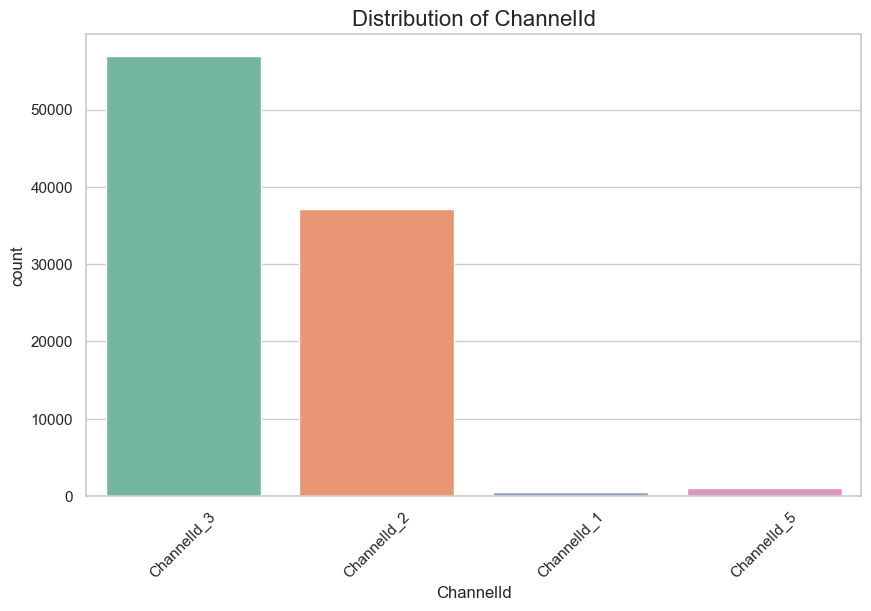

C:\Users\Hasan\AppData\Local\Temp\ipykernel_12440\1969660462.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=feature, palette="Set2")


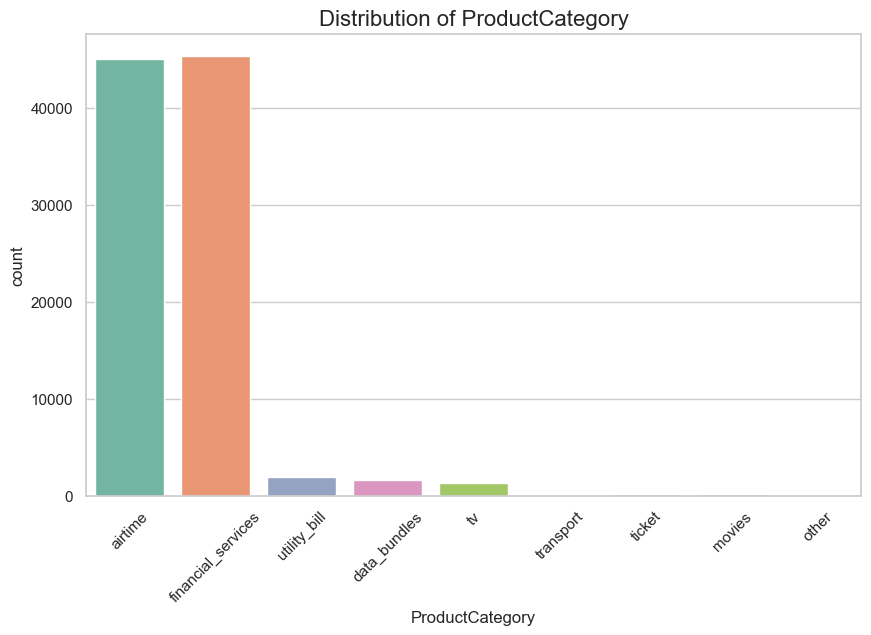

C:\Users\Hasan\AppData\Local\Temp\ipykernel_12440\1969660462.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=feature, palette="Set2")


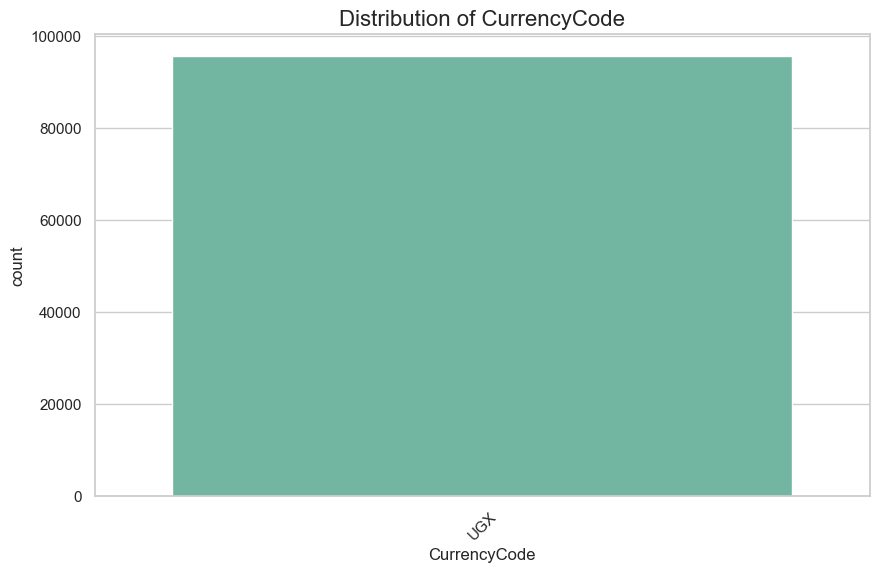

C:\Users\Hasan\AppData\Local\Temp\ipykernel_12440\1969660462.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=feature, palette="Set2")


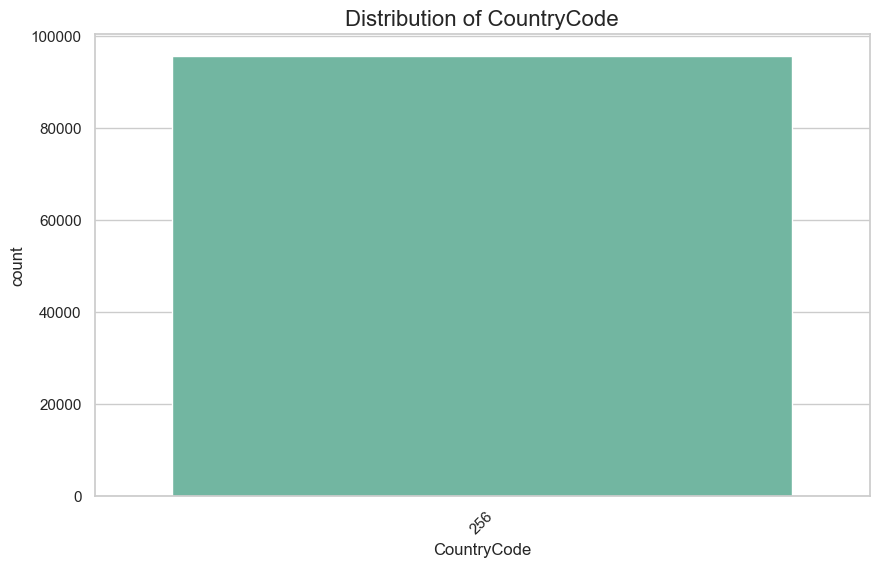

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
#Distribution of categorical variable
# Set plot style
sns.set(style="whitegrid")

# Plot the distribution of each categorical feature
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=feature, palette="Set2")
    plt.title(f'Distribution of {feature}', fontsize=16)
    plt.xticks(rotation=45)  # Rotate x labels for better readability
    plt.show()


C:\Users\Hasan\AppData\Local\Temp\ipykernel_12440\523277066.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=feature, order=top_categories, palette="Set2")


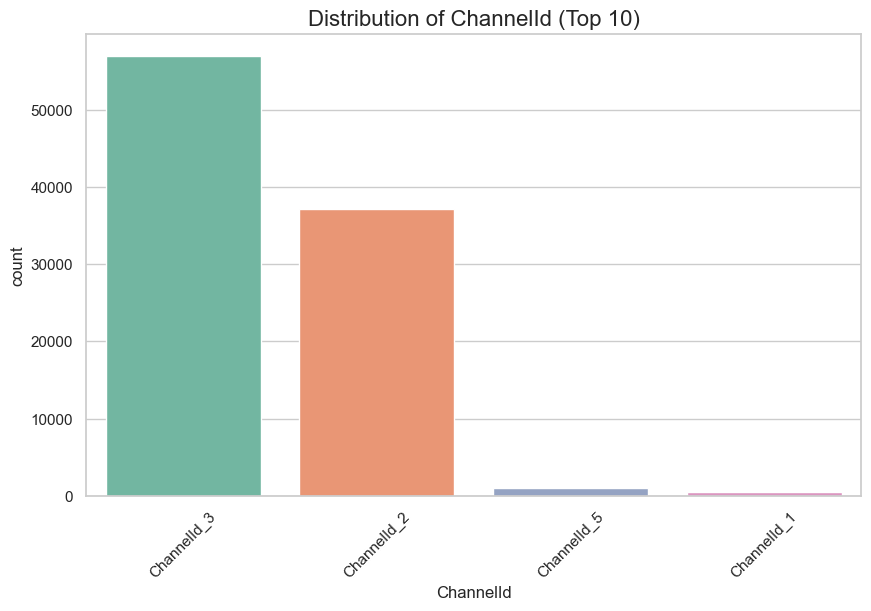

C:\Users\Hasan\AppData\Local\Temp\ipykernel_12440\523277066.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=feature, order=top_categories, palette="Set2")


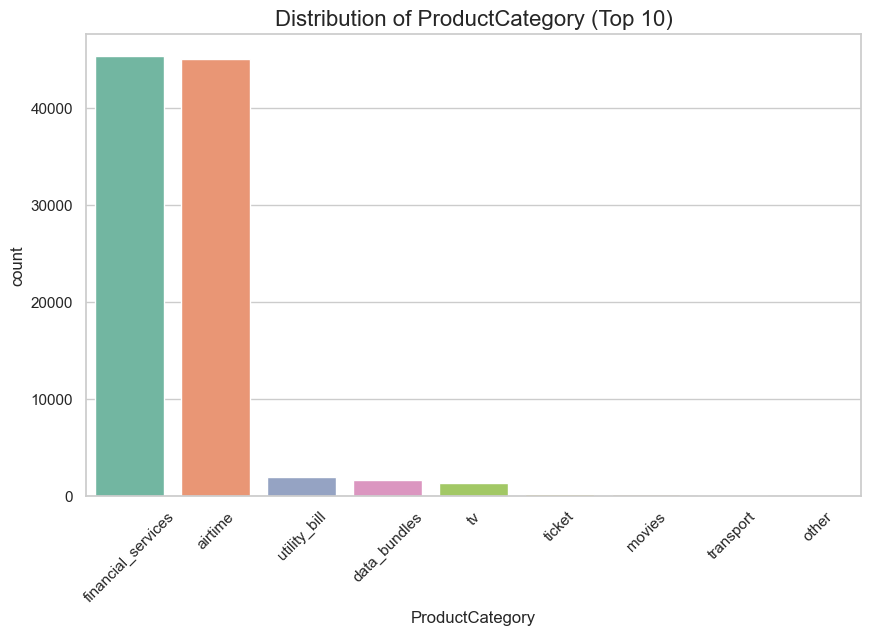

C:\Users\Hasan\AppData\Local\Temp\ipykernel_12440\523277066.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=feature, order=top_categories, palette="Set2")


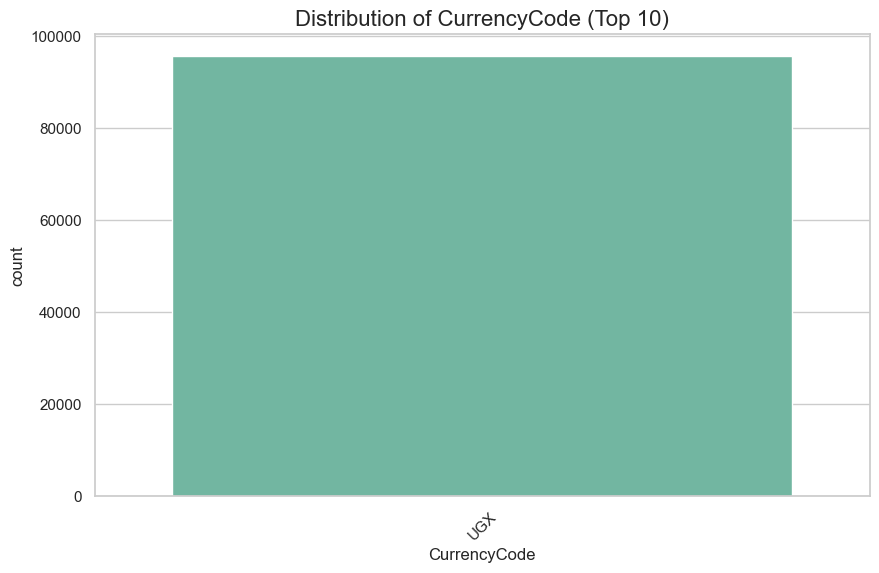

C:\Users\Hasan\AppData\Local\Temp\ipykernel_12440\523277066.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=feature, order=top_categories, palette="Set2")


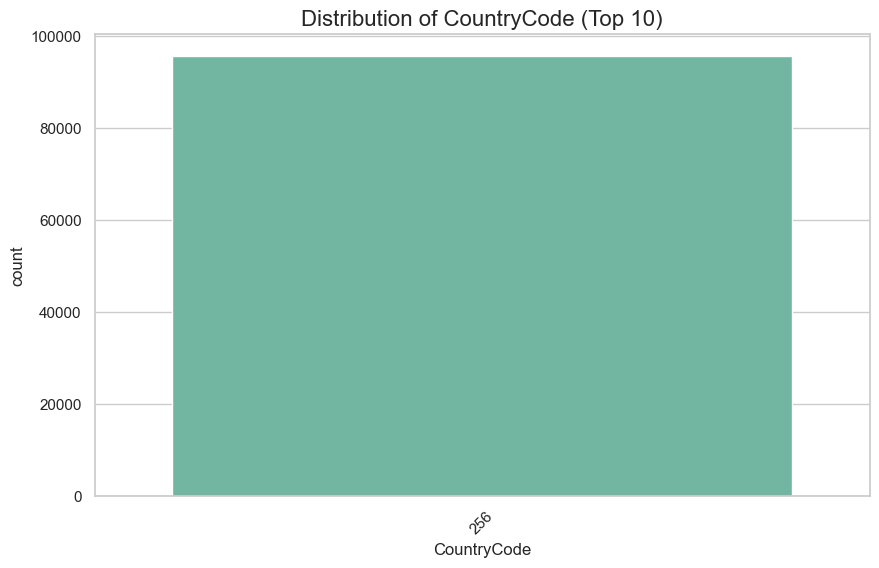

In [11]:
# Handling High Cardinality Features
# Plot the distribution of each categorical feature, but limit to the top N most frequent categories
top_n = 10  # You can adjust this number based on your preference

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    top_categories = data[feature].value_counts().nlargest(top_n).index
    sns.countplot(data=data, x=feature, order=top_categories, palette="Set2")
    plt.title(f'Distribution of {feature} (Top {top_n})', fontsize=16)
    plt.xticks(rotation=45)
    plt.show()


In [12]:
# Display percentage distribution for each categorical feature
for feature in categorical_features:
    print(f"\nPercentage distribution of {feature}:")
    print(data[feature].value_counts(normalize=True) * 100)



Percentage distribution of ChannelId:
ChannelId
ChannelId_3    59.516841
ChannelId_2    38.825239
ChannelId_5     1.095524
ChannelId_1     0.562397
Name: proportion, dtype: float64

Percentage distribution of ProductCategory:
ProductCategory
financial_services    47.463988
airtime               47.068847
utility_bill           2.007067
data_bundles           1.686145
tv                     1.336999
ticket                 0.225795
movies                 0.182936
transport              0.026134
other                  0.002091
Name: proportion, dtype: float64

Percentage distribution of CurrencyCode:
CurrencyCode
UGX    100.0
Name: proportion, dtype: float64

Percentage distribution of CountryCode:
CountryCode
256    100.0
Name: proportion, dtype: float64


In [13]:
# Compute correlation matrix for numerical features
correlation_matrix = data[numerical_features].corr()

# Display the correlation matrix
print(correlation_matrix)


                        Amount     Value  TransactionHour  \
Amount                1.000000  0.989692        -0.001611   
Value                 0.989692  1.000000         0.000474   
TransactionHour      -0.001611  0.000474         1.000000   
TransactionDayOfWeek  0.004241 -0.013759        -0.004345   
IsWeekend             0.003825 -0.007997         0.019099   

                      TransactionDayOfWeek  IsWeekend  
Amount                            0.004241   0.003825  
Value                            -0.013759  -0.007997  
TransactionHour                  -0.004345   0.019099  
TransactionDayOfWeek              1.000000   0.678937  
IsWeekend                         0.678937   1.000000  


In [14]:
# Set a threshold for high correlation (e.g., 0.7 or -0.7)
threshold = 0.7

# Find pairs of highly correlated features
highly_correlated = correlation_matrix.abs() > threshold
for feature in highly_correlated.columns:
    correlated_features = highly_correlated[feature].index[highly_correlated[feature]].tolist()
    if len(correlated_features) > 1:
        print(f"\nHighly correlated with {feature}: {', '.join(correlated_features)}")



Highly correlated with Amount: Amount, Value

Highly correlated with Value: Amount, Value


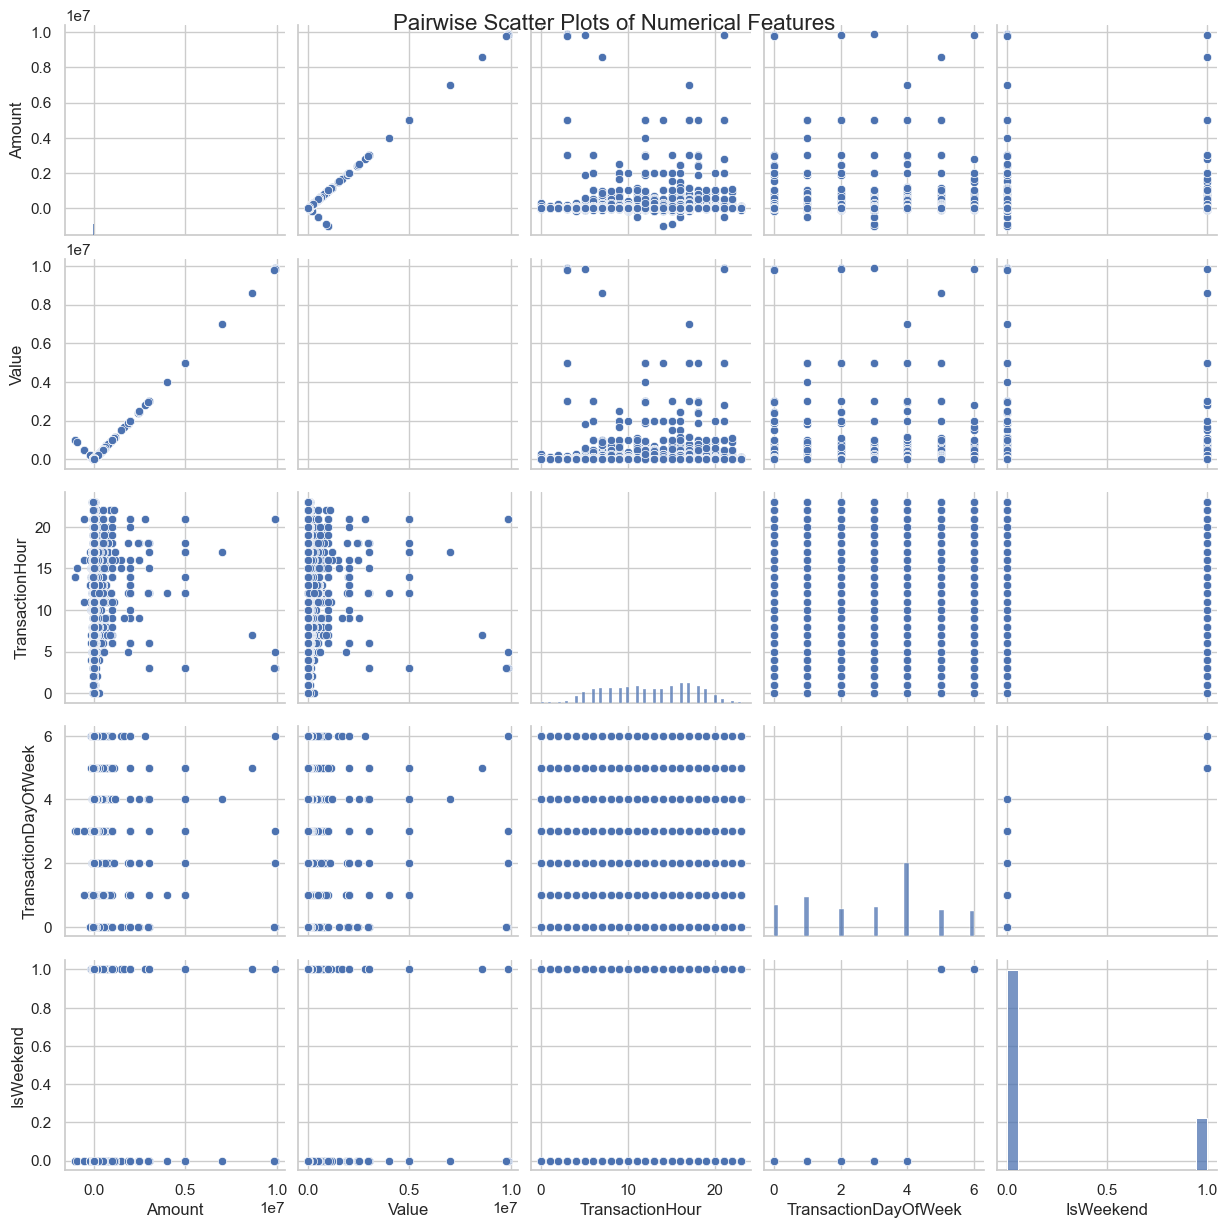

In [15]:
# Pairwise scatter plots for numerical features
sns.pairplot(data[numerical_features])
plt.suptitle('Pairwise Scatter Plots of Numerical Features', fontsize=16)
plt.show()



Missing Values:
Series([], dtype: int64)


<Figure size 1000x600 with 0 Axes>

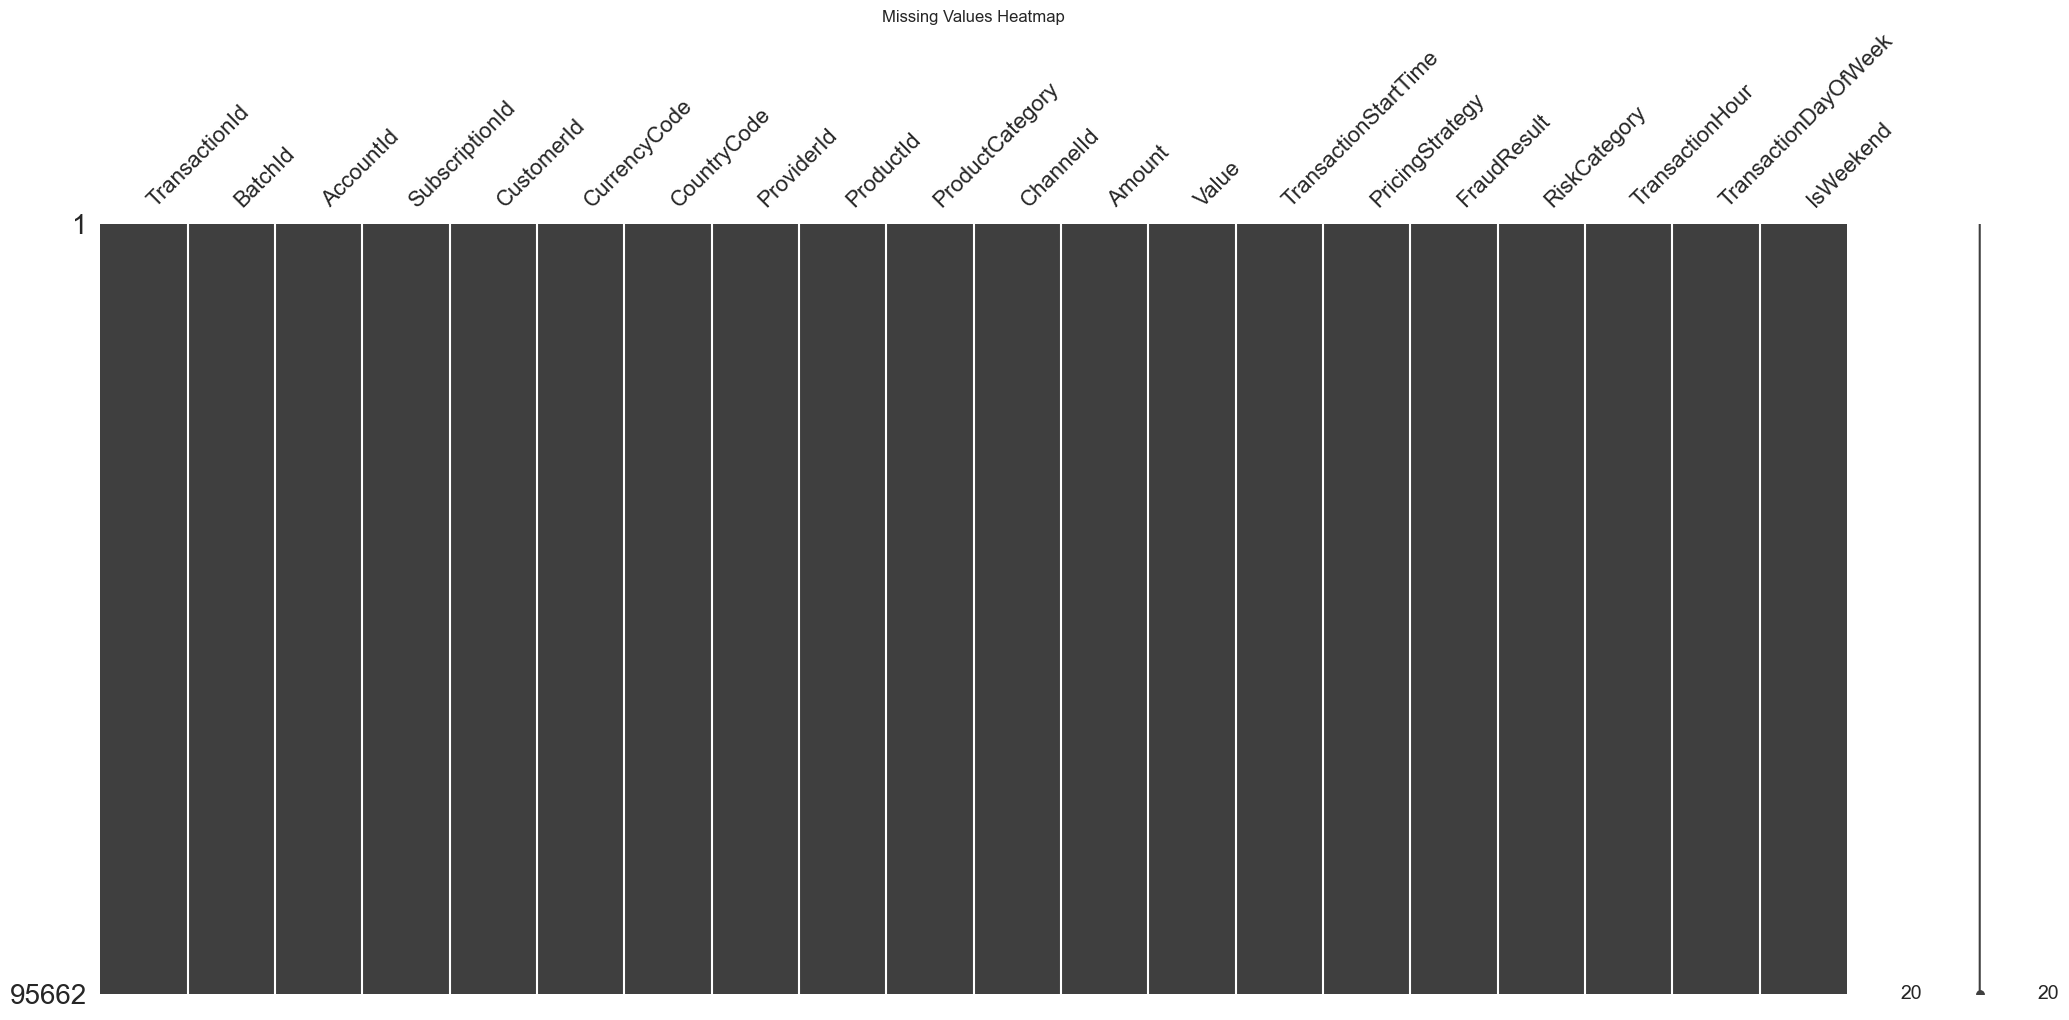

In [16]:
# Check for missing values
print("\nMissing Values:")
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

# Visualize missing values
import missingno as msno
plt.figure(figsize=(10, 6))
msno.matrix(data)
plt.title("Missing Values Heatmap")
plt.show()

C:\Users\Hasan\AppData\Local\Temp\ipykernel_12440\856380593.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=feature, palette="Set2")


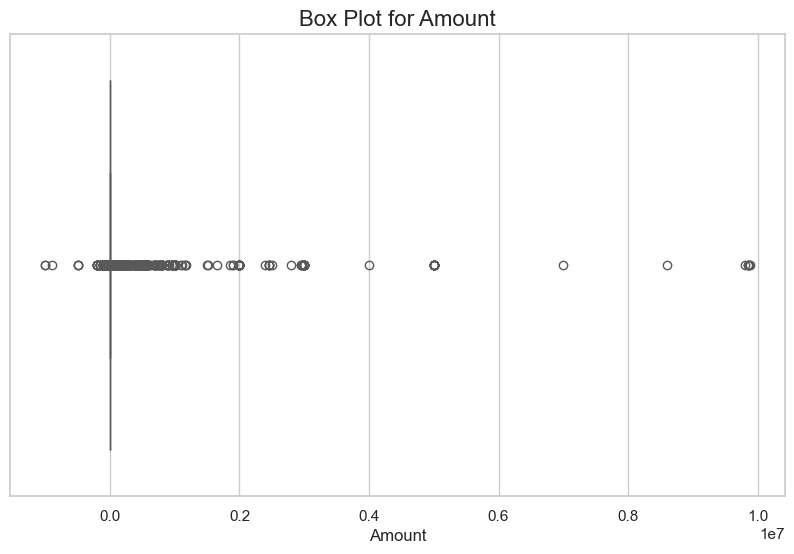

C:\Users\Hasan\AppData\Local\Temp\ipykernel_12440\856380593.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=feature, palette="Set2")


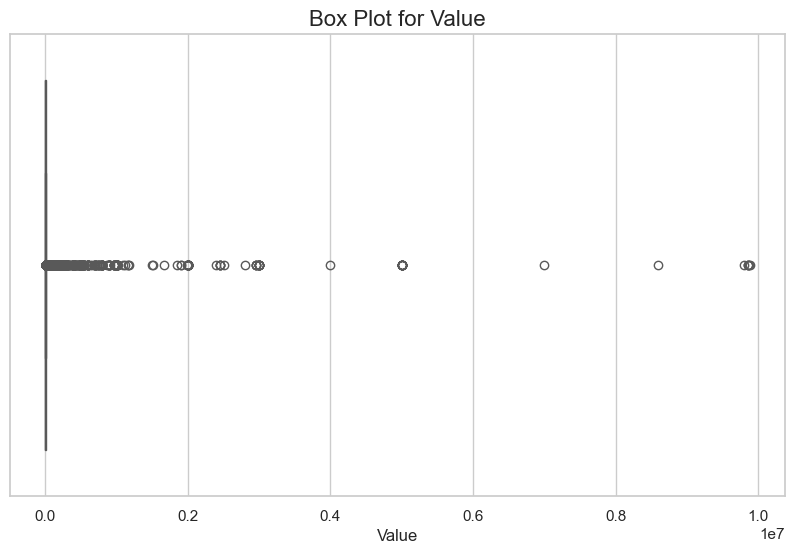

C:\Users\Hasan\AppData\Local\Temp\ipykernel_12440\856380593.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=feature, palette="Set2")


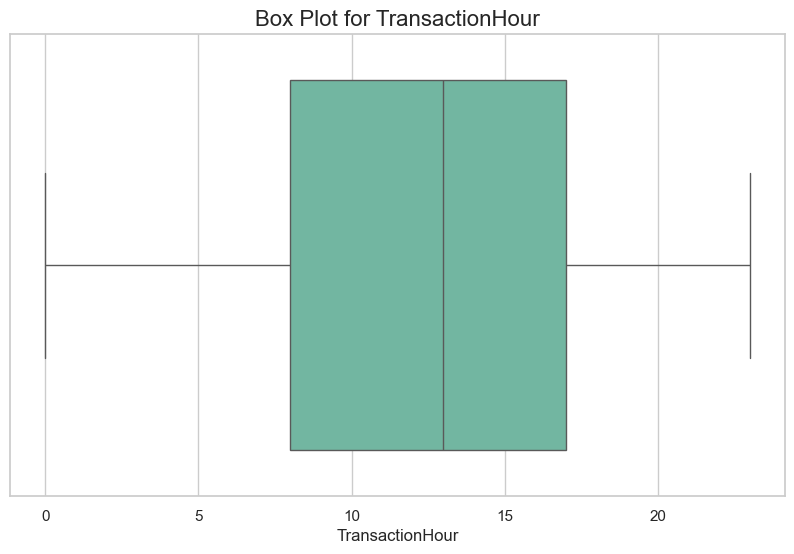

C:\Users\Hasan\AppData\Local\Temp\ipykernel_12440\856380593.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=feature, palette="Set2")


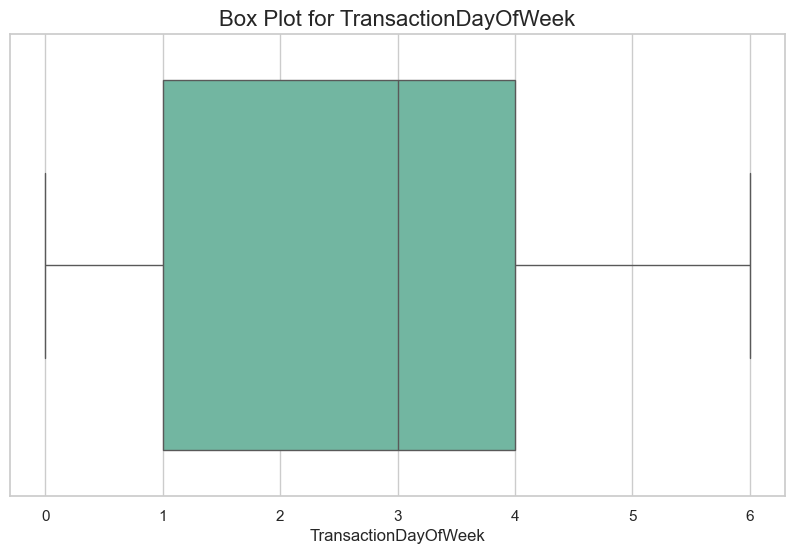

C:\Users\Hasan\AppData\Local\Temp\ipykernel_12440\856380593.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=feature, palette="Set2")


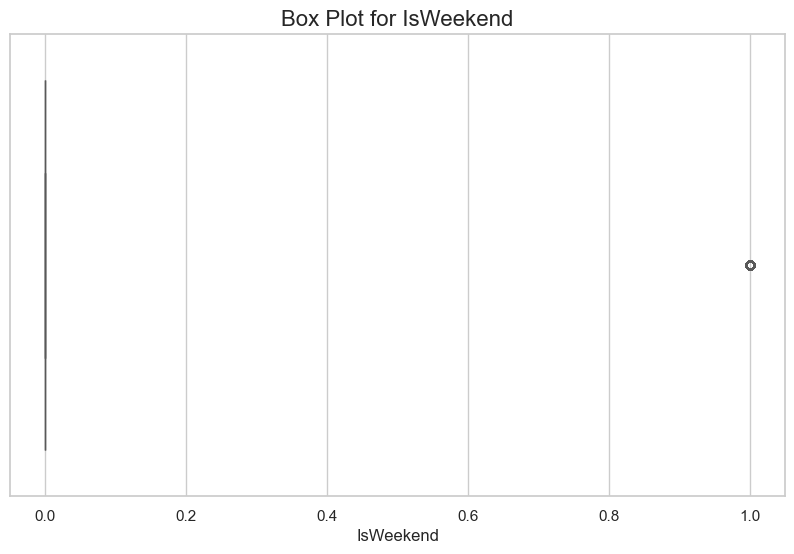

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Create box plots for each numerical feature
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data, x=feature, palette="Set2")
    plt.title(f'Box Plot for {feature}', fontsize=16)
    plt.show()


In [18]:
# Calculate the IQR for each numerical feature
for feature in numerical_features:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find the outliers
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    
    print(f"\nOutliers for {feature}:")
    print(outliers[feature].head())  # Display the first few outliers

    # Optionally, display the count of outliers
    print(f"Number of outliers for {feature}: {len(outliers)}")



Outliers for Amount:
3     20000.0
6     10000.0
32    10000.0
39     8000.0
40     8000.0
Name: Amount, dtype: float64
Number of outliers for Amount: 24441

Outliers for Value:
3      21800
52     30000
57     41000
110    17000
114    15000
Name: Value, dtype: int64
Number of outliers for Value: 9021

Outliers for TransactionHour:
Series([], Name: TransactionHour, dtype: int32)
Number of outliers for TransactionHour: 0

Outliers for TransactionDayOfWeek:
Series([], Name: TransactionDayOfWeek, dtype: int32)
Number of outliers for TransactionDayOfWeek: 0

Outliers for IsWeekend:
2188    1
2189    1
2190    1
2191    1
2192    1
Name: IsWeekend, dtype: int64
Number of outliers for IsWeekend: 19789


In [19]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()
print(f"Missing values in each feature:\n{missing_values}")


Missing values in each feature:
TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
RiskCategory            0
TransactionHour         0
TransactionDayOfWeek    0
IsWeekend               0
dtype: int64


In [20]:
# Fill missing values for numerical features with the median
for feature in numerical_features:
    data[feature].fillna(data[feature].median(), inplace=True)

# Fill missing values for categorical features with the mode (most frequent category)
for feature in categorical_features:
    data[feature].fillna(data[feature].mode()[0], inplace=True)


C:\Users\Hasan\AppData\Local\Temp\ipykernel_12440\3109195670.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[feature].fillna(data[feature].median(), inplace=True)
C:\Users\Hasan\AppData\Local\Temp\ipykernel_12440\3109195670.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

C:\Users\Hasan\AppData\Local\Temp\ipykernel_12440\3937976889.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.index, y=missing_values.values, palette='viridis')


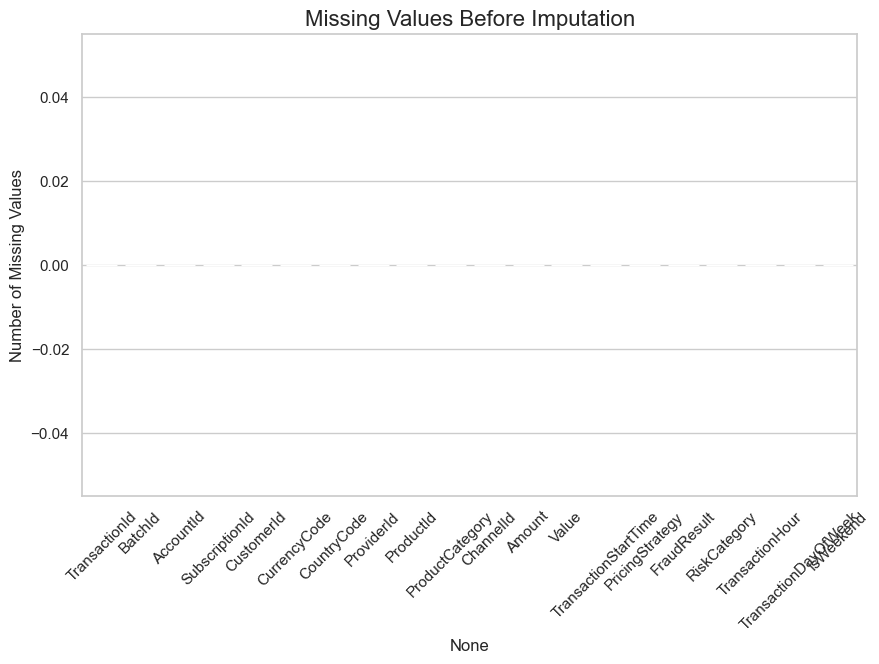

In [21]:
# Visualize missing values before imputation
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, palette='viridis')
plt.title("Missing Values Before Imputation", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('Number of Missing Values')
plt.show()


C:\Users\Hasan\AppData\Local\Temp\ipykernel_12440\4180917906.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values_after.index, y=missing_values_after.values, palette='viridis')


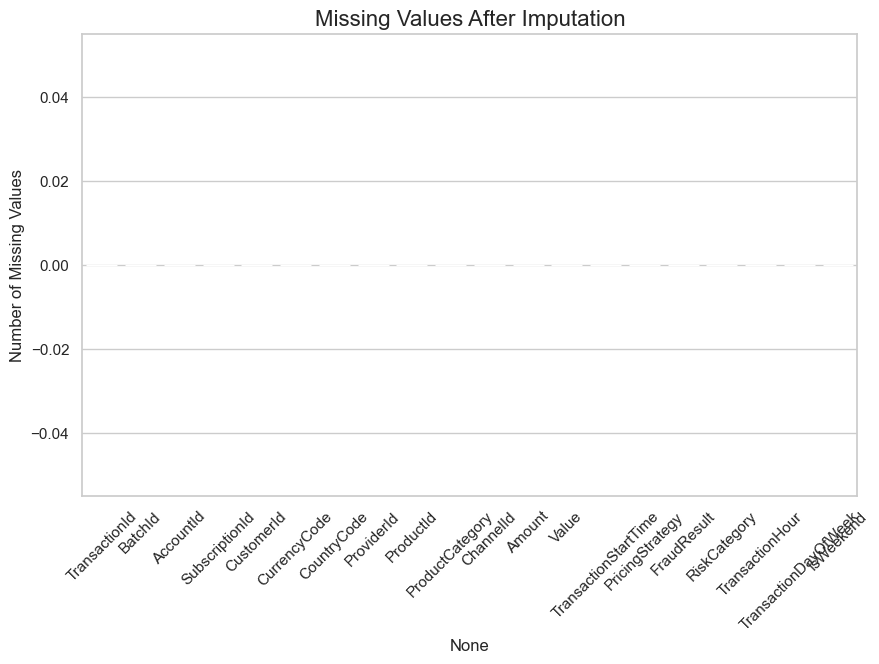

In [22]:
# Check for missing values after imputation
missing_values_after = data.isnull().sum()

# Visualize missing values after imputation
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values_after.index, y=missing_values_after.values, palette='viridis')
plt.title("Missing Values After Imputation", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('Number of Missing Values')
plt.show()


In [23]:
# Aggregate features grouped by CustomerId
aggregate_features = data.groupby('CustomerId').agg(
    TotalTransactionAmount=('Amount', 'sum'),
    AvgTransactionAmount=('Amount', 'mean'),
    TransactionCount=('Amount', 'count'),
    StdTransactionAmount=('Amount', 'std')
).reset_index()

# Merge the aggregate features back into the original dataset
data = data.merge(aggregate_features, on='CustomerId', how='left')

# Display the new features
print(data.head())


         TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3    TransactionId_380  BatchId_102363   AccountId_648  SubscriptionId_2185   
4  TransactionId_28195   BatchId_38780  AccountId_4841  SubscriptionId_3829   

        CustomerId CurrencyCode  CountryCode    ProviderId     ProductId  \
0  CustomerId_4406          UGX          256  ProviderId_6  ProductId_10   
1  CustomerId_4406          UGX          256  ProviderId_4   ProductId_6   
2  CustomerId_4683          UGX          256  ProviderId_6   ProductId_1   
3   CustomerId_988          UGX          256  ProviderId_1  ProductId_21   
4   CustomerId_988          UGX          256  ProviderId_4   ProductId_6   

      ProductCategory  ... PricingStrategy  FraudResult  RiskCategor

In [25]:
# Create aggregate features grouped by CustomerId
aggregate_features = data.groupby('CustomerId').agg(
    TotalTransactionAmount=('Amount', 'sum'),  # Sum of all transaction amounts
    AvgTransactionAmount=('Amount', 'mean'),  # Average transaction amount
    TransactionCount=('Amount', 'count'),     # Number of transactions
    StdTransactionAmount=('Amount', 'std')    # Standard deviation of transaction amounts
).reset_index()

# Fill missing values for StdTransactionAmount (e.g., customers with only one transaction)
aggregate_features['StdTransactionAmount'] = aggregate_features['StdTransactionAmount'].fillna(0)

# Merge the aggregate features back into the original dataset
data = data.merge(aggregate_features, on='CustomerId', how='left')

# Display the dataset with the new features
print("Data with Aggregate Features:")
print(data.head())


Data with Aggregate Features:
         TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3    TransactionId_380  BatchId_102363   AccountId_648  SubscriptionId_2185   
4  TransactionId_28195   BatchId_38780  AccountId_4841  SubscriptionId_3829   

        CustomerId CurrencyCode  CountryCode    ProviderId     ProductId  \
0  CustomerId_4406          UGX          256  ProviderId_6  ProductId_10   
1  CustomerId_4406          UGX          256  ProviderId_4   ProductId_6   
2  CustomerId_4683          UGX          256  ProviderId_6   ProductId_1   
3   CustomerId_988          UGX          256  ProviderId_1  ProductId_21   
4   CustomerId_988          UGX          256  ProviderId_4   ProductId_6   

      ProductCategory  ... Transaction

In [26]:
# Ensure TransactionStartTime is a datetime object
data['TransactionStartTime'] = pd.to_datetime(data['TransactionStartTime'], errors='coerce')

# Extract time-based features
data['TransactionHour'] = data['TransactionStartTime'].dt.hour
data['TransactionDay'] = data['TransactionStartTime'].dt.day
data['TransactionMonth'] = data['TransactionStartTime'].dt.month
data['TransactionYear'] = data['TransactionStartTime'].dt.year

# Drop the original TransactionStartTime if it's no longer needed
data = data.drop(columns=['TransactionStartTime'])

# Display the new features
print("Time-based features added:")
print(data[['TransactionHour', 'TransactionDay', 'TransactionMonth', 'TransactionYear']].head())


Time-based features added:
   TransactionHour  TransactionDay  TransactionMonth  TransactionYear
0                2              15                11             2018
1                2              15                11             2018
2                2              15                11             2018
3                3              15                11             2018
4                3              15                11             2018


In [28]:
from sklearn.preprocessing import OneHotEncoder

# Define categorical features
categorical_features = ['ChannelId', 'ProductCategory', 'CurrencyCode', 'CountryCode']

# Perform One-Hot Encoding
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_features = encoder.fit_transform(data[categorical_features])

# Convert the encoded features to a DataFrame
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

# Add the encoded features to the dataset
data = pd.concat([data.reset_index(drop=True), encoded_df], axis=1)

# Drop original categorical columns after encoding
data = data.drop(columns=categorical_features)

print("One-Hot Encoded features added:")
print(data.head())


One-Hot Encoded features added:
         TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3    TransactionId_380  BatchId_102363   AccountId_648  SubscriptionId_2185   
4  TransactionId_28195   BatchId_38780  AccountId_4841  SubscriptionId_3829   

        CustomerId    ProviderId     ProductId   Amount  Value  \
0  CustomerId_4406  ProviderId_6  ProductId_10   1000.0   1000   
1  CustomerId_4406  ProviderId_4   ProductId_6    -20.0     20   
2  CustomerId_4683  ProviderId_6   ProductId_1    500.0    500   
3   CustomerId_988  ProviderId_1  ProductId_21  20000.0  21800   
4   CustomerId_988  ProviderId_4   ProductId_6   -644.0    644   

   PricingStrategy  ...  ProductCategory_data_bundles  \
0                2  ...                

In [34]:
# Automatically select one-hot encoded ProductCategory columns
product_category_features = [col for col in data.columns if col.startswith('ProductCategory_')]

# Combine numerical features and one-hot encoded ProductCategory features
numerical_features = ['Amount', 'Value', 'TransactionHour', 'TransactionDay', 'TransactionMonth', 'TransactionYear']
final_features = numerical_features + product_category_features

# Define the target variable
target = 'RiskCategory'

# Feature matrix (X) and target vector (y)
X = data[final_features]
y = data[target]

print("Selected features for modeling:")
print(final_features)


Selected features for modeling:
['Amount', 'Value', 'TransactionHour', 'TransactionDay', 'TransactionMonth', 'TransactionYear', 'ProductCategory_airtime', 'ProductCategory_data_bundles', 'ProductCategory_financial_services', 'ProductCategory_movies', 'ProductCategory_other', 'ProductCategory_ticket', 'ProductCategory_transport', 'ProductCategory_tv', 'ProductCategory_utility_bill']


In [36]:
# Check for missing values
print("Missing Values in Dataset:")
print(data.isnull().sum())


Missing Values in Dataset:
TransactionId                           0
BatchId                                 0
AccountId                               0
SubscriptionId                          0
CustomerId                              0
ProviderId                              0
ProductId                               0
Amount                                  0
Value                                   0
PricingStrategy                         0
FraudResult                             0
RiskCategory                            0
TransactionHour                         0
TransactionDayOfWeek                    0
IsWeekend                               0
TotalTransactionAmount_x                0
AvgTransactionAmount_x                  0
TransactionCount_x                      0
StdTransactionAmount_x                712
TotalTransactionAmount_y                0
AvgTransactionAmount_y                  0
TransactionCount_y                      0
StdTransactionAmount_y                  0
Transac

In [39]:
from sklearn.impute import SimpleImputer

# Dynamically identify categorical features (one-hot encoded columns)
categorical_features = [col for col in data.columns if col.startswith('ChannelId_') or col.startswith('ProductCategory_') or col.startswith('CurrencyCode_') or col.startswith('CountryCode_')]

# Check for missing values
print("Missing values in categorical features before imputation:")
print(data[categorical_features].isnull().sum())

# Perform imputation only if there are missing values
if data[categorical_features].isnull().sum().sum() > 0:
    categorical_imputer = SimpleImputer(strategy='most_frequent')
    data[categorical_features] = categorical_imputer.fit_transform(data[categorical_features])

print("Missing values in categorical features after imputation:")
print(data[categorical_features].isnull().sum())


Missing values in categorical features before imputation:
ChannelId_ChannelId_1                 0
ChannelId_ChannelId_2                 0
ChannelId_ChannelId_3                 0
ChannelId_ChannelId_5                 0
ProductCategory_airtime               0
ProductCategory_data_bundles          0
ProductCategory_financial_services    0
ProductCategory_movies                0
ProductCategory_other                 0
ProductCategory_ticket                0
ProductCategory_transport             0
ProductCategory_tv                    0
ProductCategory_utility_bill          0
CurrencyCode_UGX                      0
CountryCode_256                       0
dtype: int64
Missing values in categorical features after imputation:
ChannelId_ChannelId_1                 0
ChannelId_ChannelId_2                 0
ChannelId_ChannelId_3                 0
ChannelId_ChannelId_5                 0
ProductCategory_airtime               0
ProductCategory_data_bundles          0
ProductCategory_financial_servic

In [41]:
from sklearn.preprocessing import MinMaxScaler

# Normalize numerical features
scaler = MinMaxScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

print("Numerical features normalized:")
print(data[numerical_features].head())


Numerical features normalized:
     Amount     Value  TransactionHour  TransactionDay  TransactionMonth  \
0  0.092004  0.000101         0.086957        0.466667          0.909091   
1  0.091910  0.000002         0.086957        0.466667          0.909091   
2  0.091958  0.000050         0.086957        0.466667          0.909091   
3  0.093750  0.002206         0.130435        0.466667          0.909091   
4  0.091853  0.000065         0.130435        0.466667          0.909091   

   TransactionYear  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0  


In [43]:
from sklearn.preprocessing import StandardScaler

# Standardize numerical features
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

print("Numerical features standardized:")
print(data[numerical_features].head())


Numerical features standardized:
     Amount     Value  TransactionHour  TransactionDay  TransactionMonth  \
0 -0.046371 -0.072291        -2.155530       -0.100739          0.848684   
1 -0.054643 -0.080251        -2.155530       -0.100739          0.848684   
2 -0.050426 -0.076352        -2.155530       -0.100739          0.848684   
3  0.107717  0.096648        -1.949214       -0.100739          0.848684   
4 -0.059704 -0.075183        -1.949214       -0.100739          0.848684   

   TransactionYear  
0        -0.994246  
1        -0.994246  
2        -0.994246  
3        -0.994246  
4        -0.994246  


In [51]:

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Handle missing values for numerical features
numerical_features = ['Amount', 'Value', 'TransactionHour', 'TransactionDay', 'TransactionMonth', 'TransactionYear']
imputer = SimpleImputer(strategy='median')  # Fill missing values with the median
data[numerical_features] = imputer.fit_transform(data[numerical_features])

# Automatically select one-hot encoded ProductCategory columns
product_category_features = [col for col in data.columns if col.startswith('ProductCategory_')]

# Combine numerical features and one-hot encoded ProductCategory features
final_features = numerical_features + product_category_features

# Define the target variable
target = 'RiskCategory'

# Feature matrix (X) and target vector (y)
X = data[final_features]
y = data[target]

print("Selected features for modeling:")
print(final_features)


Selected features for modeling:
['Amount', 'Value', 'TransactionHour', 'TransactionDay', 'TransactionMonth', 'TransactionYear', 'ProductCategory_airtime', 'ProductCategory_data_bundles', 'ProductCategory_financial_services', 'ProductCategory_movies', 'ProductCategory_other', 'ProductCategory_ticket', 'ProductCategory_transport', 'ProductCategory_tv', 'ProductCategory_utility_bill']


In [53]:
def calculate_woe(data, feature, target):
    """
    Calculate Weight of Evidence for a given feature based on the target.
    """
    # Create bins using KBinsDiscretizer (equidistant binning here)
    discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
    data['Binned_' + feature] = discretizer.fit_transform(data[[feature]])

    # Calculate WoE for each bin
    woe_dict = {}
    for bin in data['Binned_' + feature].unique():
        # Proportions of good (0) and bad (1) users in the bin
        bin_data = data[data['Binned_' + feature] == bin]
        good_pct = len(bin_data[bin_data[target] == 0]) / len(bin_data)
        bad_pct = len(bin_data[bin_data[target] == 1]) / len(bin_data)
        
        # Calculate WoE (Log( Good / Bad ))
        woe_dict[bin] = np.log(good_pct / bad_pct) if bad_pct != 0 else np.inf  # Avoid division by zero

    # Map WoE values to the bins
    data['WoE_' + feature] = data['Binned_' + feature].map(woe_dict)
    
    return data

# Apply WoE binning for each continuous feature
for feature in numerical_features:
    data = calculate_woe(data, feature, 'RiskCategory')

# The transformed data now has WoE values for the numerical features


C:\Users\Hasan\AppData\Local\Temp\ipykernel_12440\1990961325.py:18: RuntimeWarning: divide by zero encountered in log
  woe_dict[bin] = np.log(good_pct / bad_pct) if bad_pct != 0 else np.inf  # Avoid division by zero
C:\Users\Hasan\AppData\Local\Temp\ipykernel_12440\1990961325.py:18: RuntimeWarning: divide by zero encountered in log
  woe_dict[bin] = np.log(good_pct / bad_pct) if bad_pct != 0 else np.inf  # Avoid division by zero


In [55]:
# Prepare the final feature set for modeling after WoE transformation
X_woe = data[['WoE_' + feature for feature in numerical_features] + product_category_features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_woe, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 76529
Test set size: 19133


In [58]:
def calculate_woe(data, feature, target):
    """
    Calculate Weight of Evidence for a given feature based on the target.
    Handles infinite WoE values by setting them to a large finite value.
    """
    # Create bins using KBinsDiscretizer (equidistant binning here)
    discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
    data['Binned_' + feature] = discretizer.fit_transform(data[[feature]])

    # Calculate WoE for each bin
    woe_dict = {}
    for bin in data['Binned_' + feature].unique():
        # Proportions of good (0) and bad (1) users in the bin
        bin_data = data[data['Binned_' + feature] == bin]
        good_pct = len(bin_data[bin_data[target] == 0]) / len(bin_data)
        bad_pct = len(bin_data[bin_data[target] == 1]) / len(bin_data)
        
        # Calculate WoE (Log( Good / Bad ))
        try:
            woe_value = np.log(good_pct / bad_pct) if bad_pct != 0 else np.inf  # Avoid division by zero
        except ZeroDivisionError:
            woe_value = np.inf  # If both good_pct and bad_pct are zero
        woe_dict[bin] = woe_value
    
    # Map WoE values to the bins
    data['WoE_' + feature] = data['Binned_' + feature].map(woe_dict)

    # Replace infinity with a large value (if necessary, you can also replace with NaN or another number)
    data['WoE_' + feature].replace([np.inf, -np.inf], 1000, inplace=True)  # Example: set to 1000

    # Handle NaN values (if any)
    data['WoE_' + feature].fillna(0, inplace=True)  # Replace NaN values with 0 (or another number)

    return data

# Apply WoE binning for each continuous feature
for feature in numerical_features:
    data = calculate_woe(data, feature, 'RiskCategory')

# The transformed data now has WoE values for the numerical features


C:\Users\Hasan\AppData\Local\Temp\ipykernel_12440\4077930503.py:20: RuntimeWarning: divide by zero encountered in log
  woe_value = np.log(good_pct / bad_pct) if bad_pct != 0 else np.inf  # Avoid division by zero
C:\Users\Hasan\AppData\Local\Temp\ipykernel_12440\4077930503.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['WoE_' + feature].replace([np.inf, -np.inf], 1000, inplace=True)  # Example: set to 1000
C:\Users\Hasan\AppData\Local\Temp\ipykernel_12440\4077930503.py:32: FutureWarning: A value is trying to be set 

In [60]:
# Prepare the final feature set for modeling after WoE transformation
X_woe = data[['WoE_' + feature for feature in numerical_features] + product_category_features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_woe, y, test_size=0.2, random_state=42)

# Initialize and train the model (Logistic Regression in this case)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC score

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ROC AUC score (to evaluate model performance)
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC Score: {roc_auc:.2f}")


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19089
           1       0.00      0.00      0.00        44

    accuracy                           1.00     19133
   macro avg       0.50      0.50      0.50     19133
weighted avg       1.00      1.00      1.00     19133

ROC AUC Score: 0.75


c:\Users\Hasan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Hasan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Hasan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


First few rows of relevant columns (TransactionYear, TransactionMonth, TransactionDay):
Empty DataFrame
Columns: [TransactionYear, TransactionMonth, TransactionDay]
Index: []
Shape of data (before any filtering): (0, 60)
Missing values in date columns: 
TransactionYear     0
TransactionMonth    0
TransactionDay      0
dtype: int64
Type of date_combinations: <class 'pandas.core.frame.DataFrame'>
Shape of date_combinations: (0, 3)
First few date combinations: Empty DataFrame
Columns: [TransactionYear, TransactionMonth, TransactionDay]
Index: []
date_combinations is still a DataFrame. Attempting to convert it to a Series.
Invalid date combinations found: Series([], Name: TransactionYear, dtype: object)
Remaining data after filtering invalid dates: 0 rows


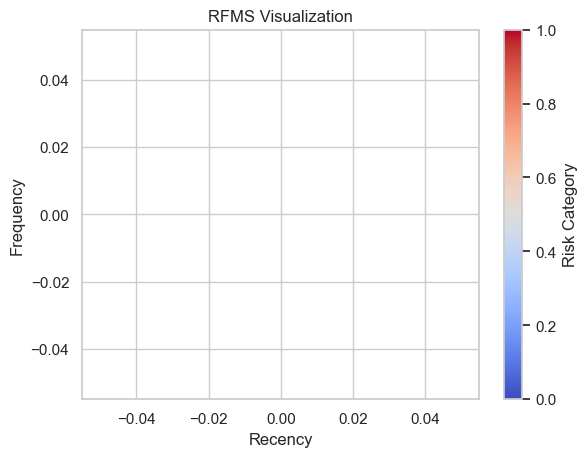

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Inspect the relevant columns before combining
print("First few rows of relevant columns (TransactionYear, TransactionMonth, TransactionDay):")
print(data[['TransactionYear', 'TransactionMonth', 'TransactionDay']].head())

# Check the shape of the DataFrame and make sure the columns have data
print(f"Shape of data (before any filtering): {data.shape}")
print(f"Missing values in date columns: \n{data[['TransactionYear', 'TransactionMonth', 'TransactionDay']].isnull().sum()}")

# Step 2: Combine the columns into a date format (check if there's any issue in this process)
date_combinations = data[['TransactionYear', 'TransactionMonth', 'TransactionDay']].astype(str).agg('-'.join, axis=1)

# Step 3: Check the type and shape of date_combinations before applying any further operation
print(f"Type of date_combinations: {type(date_combinations)}")
print(f"Shape of date_combinations: {date_combinations.shape}")
print(f"First few date combinations: {date_combinations.head()}")

# Step 4: Ensure date_combinations is a Series (convert if necessary)
if isinstance(date_combinations, pd.DataFrame):
    print("date_combinations is still a DataFrame. Attempting to convert it to a Series.")
    date_combinations = date_combinations.iloc[:, 0]  # Extract the first column

# Step 5: Ensure all date combinations are in a valid format
invalid_dates = date_combinations[~date_combinations.str.match(r'^\d{4}-\d{1,2}-\d{1,2}$')]
print(f"Invalid date combinations found: {invalid_dates}")

# Step 6: Filter out rows with invalid date combinations (if any)
data = data[date_combinations.str.match(r'^\d{4}-\d{1,2}-\d{1,2}$')]

# Step 7: Check the data again after filtering
print(f"Remaining data after filtering invalid dates: {data.shape[0]} rows")

# Step 8: Try constructing the 'TransactionDate' column again
data['TransactionDate'] = pd.to_datetime(date_combinations)

# Step 9: Apply the RFMS calculation
def calculate_rfms(data):
    # Recency: Days since last transaction (max date in data)
    data['Recency'] = (data['TransactionDate'].max() - data['TransactionDate']).dt.days
    
    # Frequency: Number of transactions per user
    data['Frequency'] = data.groupby('CustomerId')['TransactionId'].transform('count')
    
    # Monetary: Total amount spent by the customer
    data['Monetary'] = data.groupby('CustomerId')['Amount'].transform('sum')
    
    # Size: Average transaction size
    data['Size'] = data.groupby('CustomerId')['Amount'].transform('mean')
    
    return data

# Apply RFMS calculation
data = calculate_rfms(data)

# Step 10: Visualize users' scores in the RFMS space (e.g., Recency vs Frequency)
plt.scatter(data['Recency'], data['Frequency'], c=data['RiskCategory'], cmap='coolwarm')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('RFMS Visualization')
plt.colorbar(label='Risk Category')
plt.show()


In [91]:
# Step 1: Ensure 'TransactionStartTime' is in datetime format
data['TransactionStartTime'] = pd.to_datetime(data['TransactionStartTime'])

# Step 2: Create 'TransactionDate' from 'TransactionStartTime'
data['TransactionDate'] = data['TransactionStartTime'].dt.date

# Step 3: Check the datatype of 'TransactionDate' to confirm it's a datetime object
print(f"Data type of 'TransactionDate': {data['TransactionDate'].dtype}")

# Step 4: If 'TransactionDate' is not datetime, convert it to datetime
if data['TransactionDate'].dtype != 'datetime64[ns]':
    data['TransactionDate'] = pd.to_datetime(data['TransactionDate'], errors='coerce')

# Step 5: Calculate Recency (days since the most recent transaction)
most_recent_date = data['TransactionDate'].max()  # Get the latest transaction date
print(f"Most recent transaction date: {most_recent_date}")

# Ensure that 'Recency' is calculated only if 'TransactionDate' is valid
if pd.api.types.is_datetime64_any_dtype(data['TransactionDate']):
    data['Recency'] = (most_recent_date - data['TransactionDate']).dt.days
else:
    print("Error: 'TransactionDate' is not in datetime format. Unable to calculate Recency.")

# Step 6: Preview the result
print(data[['TransactionDate', 'Recency']].head())


Data type of 'TransactionDate': object
Most recent transaction date: 2019-02-13 00:00:00
  TransactionDate  Recency
0      2018-11-15       90
1      2018-11-15       90
2      2018-11-15       90
3      2018-11-15       90
4      2018-11-15       90


In [96]:
# Assuming Recency is already calculated

# Frequency: Count of transactions per customer
data['Frequency'] = data.groupby('CustomerId')['TransactionId'].transform('count')

# Monetary: Total transaction amount per customer
data['Monetary'] = data.groupby('CustomerId')['Amount'].transform('sum')

# Size: Total number of unique products per customer (if that makes sense)
data['Size'] = data.groupby('CustomerId')['ProductId'].transform('nunique')


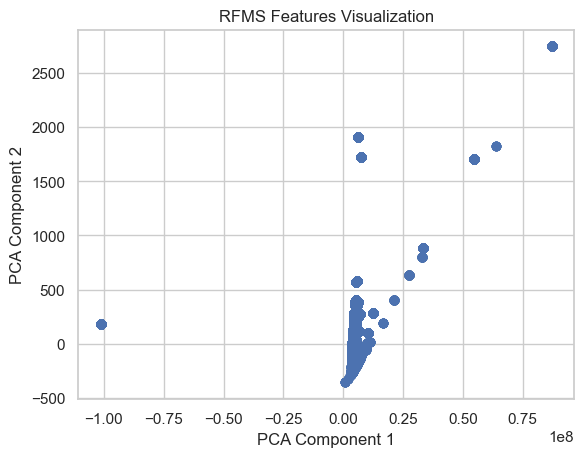

In [98]:
# Select relevant RFMS features
rfms_data = data[['Recency', 'Frequency', 'Monetary', 'Size']]

# Perform PCA to reduce to 2D or 3D for visualization
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
rfms_2d = pca.fit_transform(rfms_data)

# Create a scatter plot
import matplotlib.pyplot as plt
plt.scatter(rfms_2d[:, 0], rfms_2d[:, 1])
plt.title('RFMS Features Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [102]:
# Create 'Default' column based on 'FraudResult' (adjust logic if needed)
data['Default'] = data['FraudResult'].apply(lambda x: 1 if x == 1 else 0)

# Verify that the new column is added
print(data['Default'].value_counts())


Default
0    95469
1      193
Name: count, dtype: int64


In [104]:
# Split the data into features and target variable
X = data.drop(columns=['Default'])  # Features
y = data['Default']  # Target variable (whether a customer defaults)

# Split into training and testing sets (80-20 split)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [107]:
# List categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_columns)


Categorical columns: Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'ProviderId', 'ProductId', 'ProductCategory',
       'ChannelId'],
      dtype='object')


In [111]:
# Example of Target Encoding for a categorical feature
from sklearn.preprocessing import LabelEncoder

def target_encoding(data, column, target):
    mean_target = data.groupby(column)[target].mean()
    data[column + '_encoded'] = data[column].map(mean_target)
    return data

# Apply Target Encoding to a specific categorical column (e.g., 'ProductId')
data = target_encoding(data, 'ProductId', 'Default')




C:\Users\Hasan\AppData\Local\Temp\ipykernel_12440\1049622149.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_target = data.groupby(column)[target].mean()


In [113]:
# Frequency Encoding for a categorical feature
def frequency_encoding(data, column):
    freq = data[column].value_counts()
    data[column + '_encoded'] = data[column].map(freq)
    return data

# Apply Frequency Encoding
data = frequency_encoding(data, 'ProductId')


In [115]:
# Apply One-Hot Encoding with Sparse Matrix
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True, sparse=True)


In [117]:
# Limit categorical columns to those with fewer unique values
low_cardinality_cols = [col for col in categorical_columns if data[col].nunique() < 20]  # Example threshold
data_encoded = pd.get_dummies(data, columns=low_cardinality_cols, drop_first=True)


In [120]:
# Convert all columns to numeric, forcing errors to NaN for non-convertible columns
data_encoded = data_encoded.apply(pd.to_numeric, errors='coerce')

# Fill NaN values (if any) with a suitable method (e.g., mean imputation)
data_encoded.fillna(data_encoded.mean(), inplace=True)


In [123]:
# Check the data types of columns to ensure they are numeric
print(data_encoded.dtypes)


TransactionId                         float64
BatchId                               float64
AccountId                             float64
SubscriptionId                        float64
CustomerId                            float64
CountryCode                             int64
ProductId                             float64
Amount                                float64
Value                                   int64
TransactionStartTime                    int64
PricingStrategy                         int64
FraudResult                             int64
TransactionDate                         int64
Recency                                 int64
Frequency                               int64
Monetary                              float64
Size                                    int64
Default                                 int64
ProductId_encoded                       int64
ProviderId_ProviderId_2                  bool
ProviderId_ProviderId_3                  bool
ProviderId_ProviderId_4           

In [126]:
# Fill NaN values with column mean
data_encoded.fillna(data_encoded.mean(), inplace=True)


In [128]:
# Drop rows containing NaN values
data_encoded.dropna(inplace=True)


In [141]:
# Drop variables that may not provide much value
X_train.drop(['TransactionId', 'AccountId', 'SubscriptionId'], axis=1, inplace=True)



In [143]:
# Apply One-Hot Encoding to selected categorical columns only
categorical_columns = ['ProductCategory', 'ProviderId', 'ChannelId']
X_train = pd.get_dummies(X_train, columns=categorical_columns, drop_first=True)


In [145]:
from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding to 'CountryCode' and other suitable columns
label_encoder = LabelEncoder()
X_train['CountryCode'] = label_encoder.fit_transform(X_train['CountryCode'])


In [147]:
# Use sparse matrix with one-hot encoding
X_train_sparse = pd.get_dummies(X_train, drop_first=True, sparse=True)


In [151]:
# Convert to datetime explicitly, handling errors if necessary
X_train['TransactionStartTime'] = pd.to_datetime(X_train['TransactionStartTime'], errors='coerce')
X_train['TransactionDate'] = pd.to_datetime(X_train['TransactionDate'], errors='coerce')

# Check the datatypes to confirm the conversion
print(X_train[['TransactionStartTime', 'TransactionDate']].dtypes)


TransactionStartTime    datetime64[ns]
TransactionDate         datetime64[ns]
dtype: object


In [157]:
# Convert Unix timestamp (int64) to datetime64
X_train['TransactionStartTime'] = pd.to_datetime(X_train['TransactionStartTime'], unit='s')

# Verify the result
print(X_train['TransactionStartTime'].dtype)
print(X_train[['TransactionStartTime']].head())



datetime64[ns]
      TransactionStartTime
59096           1970-01-01
35991           1970-01-01
69457           1970-01-01
58498           1970-01-01
88790           1970-01-01


In [159]:
# Extract date-related features
X_train['StartTime_day'] = X_train['TransactionStartTime'].dt.day
X_train['StartTime_month'] = X_train['TransactionStartTime'].dt.month
X_train['StartTime_hour'] = X_train['TransactionStartTime'].dt.hour
X_train['StartTime_weekday'] = X_train['TransactionStartTime'].dt.weekday


In [164]:
# Convert any non-numeric columns to numeric (if any)
X_train = X_train.apply(pd.to_numeric, errors='coerce')

# Check for any missing values (NaNs) in your data
print(X_train.isnull().sum())

# Handle missing values (if any), for example, by filling with the mean or median
X_train.fillna(X_train.mean(), inplace=True)


BatchId                               76529
CustomerId                            76529
CurrencyCode                          76529
CountryCode                               0
ProductId                             76529
Amount                                    0
Value                                     0
TransactionStartTime                      0
PricingStrategy                           0
FraudResult                               0
TransactionDate                           0
Recency                                   0
Frequency                                 0
Monetary                                  0
Size                                      0
ProductCategory_data_bundles              0
ProductCategory_financial_services        0
ProductCategory_movies                    0
ProductCategory_other                     0
ProductCategory_ticket                    0
ProductCategory_transport                 0
ProductCategory_tv                        0
ProductCategory_utility_bill    

In [188]:

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


In [193]:
# List of columns to exclude (non-predictive columns)
exclude_columns = ['BatchId', 'CustomerId', 'TransactionStartTime', 'TransactionDate']  # Modify if needed
X_train_cleaned = X_train.drop(columns=exclude_columns, errors='ignore')
X_test_cleaned = X_test.drop(columns=exclude_columns, errors='ignore')

# Identify numeric and categorical features (using select_dtypes)
numeric_features = X_train_cleaned.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = X_train_cleaned.select_dtypes(include=['object']).columns.tolist()

# Remove any potential numeric columns that have been misclassified as numeric due to non-numeric content
# We will manually exclude columns that contain non-numeric values like currency codes
numeric_features = [col for col in numeric_features if X_train_cleaned[col].apply(pd.to_numeric, errors='coerce').notnull().all()]

# Define the transformations for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))  # Impute missing values with mean for numeric data
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent value for categorical data
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # One-hot encode categorical variables
])

# Combine preprocessing steps into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the logistic regression model
log_reg = LogisticRegression(max_iter=1000)

# Create a pipeline that first preprocesses the data and then applies the logistic regression model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', log_reg)
])

# Fit the pipeline on the training data
pipeline.fit(X_train_cleaned, y_train)

# Make predictions on the test set
y_pred_log_reg = pipeline.predict(X_test_cleaned)

# Evaluate the model
print("Logistic Regression - Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Logistic Regression - Precision:", precision_score(y_test, y_pred_log_reg))
print("Logistic Regression - Recall:", recall_score(y_test, y_pred_log_reg))
print("Logistic Regression - F1 Score:", f1_score(y_test, y_pred_log_reg))
print("Logistic Regression - ROC-AUC:", roc_auc_score(y_test, y_pred_log_reg))


Logistic Regression - Accuracy: 0.998536559870381
Logistic Regression - Precision: 0.7
Logistic Regression - Recall: 0.3888888888888889
Logistic Regression - F1 Score: 0.5
Logistic Regression - ROC-AUC: 0.6942873517073653


In [195]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.compose import ColumnTransformer

# List of columns to exclude (non-predictive columns)
exclude_columns = ['BatchId', 'CustomerId', 'TransactionStartTime', 'TransactionDate']  # Modify if needed
X_train_cleaned = X_train.drop(columns=exclude_columns, errors='ignore')
X_test_cleaned = X_test.drop(columns=exclude_columns, errors='ignore')

# Identify numeric and categorical features (using select_dtypes)
numeric_features = X_train_cleaned.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = X_train_cleaned.select_dtypes(include=['object']).columns.tolist()

# Remove any potential numeric columns that have been misclassified as numeric due to non-numeric content
# We will manually exclude columns that contain non-numeric values like currency codes
numeric_features = [col for col in numeric_features if X_train_cleaned[col].apply(pd.to_numeric, errors='coerce').notnull().all()]

# Define the transformations for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))  # Impute missing values with mean for numeric data
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent value for categorical data
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # One-hot encode categorical variables
])

# Combine preprocessing steps into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Replace LogisticRegression with RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Create a pipeline that first preprocesses the data and then applies the random forest model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', rf_classifier)
])

# Fit the pipeline on the training data
pipeline.fit(X_train_cleaned, y_train)

# Make predictions on the test set
y_pred_rf = pipeline.predict(X_test_cleaned)

# Evaluate the model
print("Random Forest - Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest - Precision:", precision_score(y_test, y_pred_rf))
print("Random Forest - Recall:", recall_score(y_test, y_pred_rf))
print("Random Forest - F1 Score:", f1_score(y_test, y_pred_rf))
print("Random Forest - ROC-AUC:", roc_auc_score(y_test, y_pred_rf))


Random Forest - Accuracy: 1.0
Random Forest - Precision: 1.0
Random Forest - Recall: 1.0
Random Forest - F1 Score: 1.0
Random Forest - ROC-AUC: 1.0


In [197]:
from sklearn.tree import DecisionTreeClassifier
# List of columns to exclude (non-predictive columns)
exclude_columns = ['BatchId', 'CustomerId', 'TransactionStartTime', 'TransactionDate']  # Modify if needed
X_train_cleaned = X_train.drop(columns=exclude_columns, errors='ignore')
X_test_cleaned = X_test.drop(columns=exclude_columns, errors='ignore')

# Identify numeric and categorical features (using select_dtypes)
numeric_features = X_train_cleaned.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = X_train_cleaned.select_dtypes(include=['object']).columns.tolist()

# Remove any potential numeric columns that have been misclassified as numeric due to non-numeric content
# We will manually exclude columns that contain non-numeric values like currency codes
numeric_features = [col for col in numeric_features if X_train_cleaned[col].apply(pd.to_numeric, errors='coerce').notnull().all()]

# Define the transformations for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))  # Impute missing values with mean for numeric data
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent value for categorical data
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # One-hot encode categorical variables
])

# Combine preprocessing steps into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Replace RandomForestClassifier with DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Create a pipeline that first preprocesses the data and then applies the decision tree model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', dt_classifier)
])

# Fit the pipeline on the training data
pipeline.fit(X_train_cleaned, y_train)

# Make predictions on the test set
y_pred_dt = pipeline.predict(X_test_cleaned)

# Evaluate the model
print("Decision Tree - Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree - Precision:", precision_score(y_test, y_pred_dt))
print("Decision Tree - Recall:", recall_score(y_test, y_pred_dt))
print("Decision Tree - F1 Score:", f1_score(y_test, y_pred_dt))
print("Decision Tree - ROC-AUC:", roc_auc_score(y_test, y_pred_dt))


Decision Tree - Accuracy: 1.0
Decision Tree - Precision: 1.0
Decision Tree - Recall: 1.0
Decision Tree - F1 Score: 1.0
Decision Tree - ROC-AUC: 1.0


In [199]:
from sklearn.ensemble import GradientBoostingClassifier
# List of columns to exclude (non-predictive columns)
exclude_columns = ['BatchId', 'CustomerId', 'TransactionStartTime', 'TransactionDate']  # Modify if needed
X_train_cleaned = X_train.drop(columns=exclude_columns, errors='ignore')
X_test_cleaned = X_test.drop(columns=exclude_columns, errors='ignore')

# Identify numeric and categorical features (using select_dtypes)
numeric_features = X_train_cleaned.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = X_train_cleaned.select_dtypes(include=['object']).columns.tolist()

# Remove any potential numeric columns that have been misclassified as numeric due to non-numeric content
# We will manually exclude columns that contain non-numeric values like currency codes
numeric_features = [col for col in numeric_features if X_train_cleaned[col].apply(pd.to_numeric, errors='coerce').notnull().all()]

# Define the transformations for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))  # Impute missing values with mean for numeric data
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent value for categorical data
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # One-hot encode categorical variables
])

# Combine preprocessing steps into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Replace RandomForestClassifier with GradientBoostingClassifier
gbm_classifier = GradientBoostingClassifier(random_state=42)

# Create a pipeline that first preprocesses the data and then applies the GBM model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', gbm_classifier)
])

# Fit the pipeline on the training data
pipeline.fit(X_train_cleaned, y_train)

# Make predictions on the test set
y_pred_gbm = pipeline.predict(X_test_cleaned)

# Evaluate the model
print("Gradient Boosting - Accuracy:", accuracy_score(y_test, y_pred_gbm))
print("Gradient Boosting - Precision:", precision_score(y_test, y_pred_gbm))
print("Gradient Boosting - Recall:", recall_score(y_test, y_pred_gbm))
print("Gradient Boosting - F1 Score:", f1_score(y_test, y_pred_gbm))
print("Gradient Boosting - ROC-AUC:", roc_auc_score(y_test, y_pred_gbm))


Gradient Boosting - Accuracy: 1.0
Gradient Boosting - Precision: 1.0
Gradient Boosting - Recall: 1.0
Gradient Boosting - F1 Score: 1.0
Gradient Boosting - ROC-AUC: 1.0


In [201]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__learning_rate': [0.05, 0.1, 0.2],
    'classifier__max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train_cleaned, y_train)

print("Best parameters found: ", grid_search.best_params_)
y_pred_gbm = grid_search.best_estimator_.predict(X_test_cleaned)

# Evaluate the tuned model
print("Gradient Boosting (Tuned) - Accuracy:", accuracy_score(y_test, y_pred_gbm))


Best parameters found:  {'classifier__learning_rate': 0.05, 'classifier__max_depth': 3, 'classifier__n_estimators': 100}
Gradient Boosting (Tuned) - Accuracy: 1.0


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Load the dataset
file_path = 'C:\\Users\\Hasan\\Desktop\\data science folder\\data.csv'
data = pd.read_csv(file_path)

# Display the first few rows to verify
print(data.head())

# Step 1: Exclude non-predictive columns
exclude_columns = [
    'TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 
    'CustomerId', 'TransactionStartTime'
]
X = data.drop(columns=exclude_columns + ['FraudResult'])  # Features
y = data['FraudResult']  # Target variable

# Step 2: Identify numeric and categorical features
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Step 3: Define preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))  # Impute missing values with the mean
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with the most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # One-hot encode categorical features
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Step 4: Define the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 5: Create a pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', rf_classifier)
])

# Step 6: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Step 8: Make predictions on the test data
y_pred_rf = pipeline.predict(X_test)

# Step 9: Evaluate the model
print("Random Forest - Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest - Precision:", precision_score(y_test, y_pred_rf))
print("Random Forest - Recall:", recall_score(y_test, y_pred_rf))
print("Random Forest - F1 Score:", f1_score(y_test, y_pred_rf))
print("Random Forest - ROC-AUC:", roc_auc_score(y_test, y_pred_rf))


         TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3    TransactionId_380  BatchId_102363   AccountId_648  SubscriptionId_2185   
4  TransactionId_28195   BatchId_38780  AccountId_4841  SubscriptionId_3829   

        CustomerId CurrencyCode  CountryCode    ProviderId     ProductId  \
0  CustomerId_4406          UGX          256  ProviderId_6  ProductId_10   
1  CustomerId_4406          UGX          256  ProviderId_4   ProductId_6   
2  CustomerId_4683          UGX          256  ProviderId_6   ProductId_1   
3   CustomerId_988          UGX          256  ProviderId_1  ProductId_21   
4   CustomerId_988          UGX          256  ProviderId_4   ProductId_6   

      ProductCategory    ChannelId   Amount  Value  TransactionStart

In [3]:
# Binary target variable
target = 'FraudResult'

# Example variable for binning
feature = 'Amount'

In [4]:
# Create bins for the feature 'Amount'
data['Amount_Bin'] = pd.qcut(data['Amount'], q=5, duplicates='drop')  # 5 bins
print(data[['Amount', 'Amount_Bin']].head())


    Amount              Amount_Bin
0   1000.0         (200.0, 1000.0]
1    -20.0         (-100.0, 200.0]
2    500.0         (200.0, 1000.0]
3  20000.0     (5000.0, 9880000.0]
4   -644.0  (-1000000.001, -100.0]


In [7]:
import numpy as np
def calculate_woe_iv(data, feature, target):
    # Create a DataFrame with counts for each bin
    df = data.groupby(feature)[target].agg(['count', 'sum'])
    df.columns = ['Total', 'Bad']
    df['Good'] = df['Total'] - df['Bad']

    # Calculate percentages
    total_good = df['Good'].sum()
    total_bad = df['Bad'].sum()
    df['P_i'] = df['Good'] / total_good
    df['N_i'] = df['Bad'] / total_bad

    # Calculate WoE
    df['WoE'] = np.log(df['P_i'] / df['N_i'])

    # Calculate IV
    df['IV'] = (df['P_i'] - df['N_i']) * df['WoE']
    iv = df['IV'].sum()

    return df[['Good', 'Bad', 'P_i', 'N_i', 'WoE', 'IV']], iv


In [8]:
# Calculate WoE and IV for the 'Amount_Bin'
woe_df, iv = calculate_woe_iv(data, 'Amount_Bin', target)

# Display WoE and IV
print("WoE Table for 'Amount_Bin':")
print(woe_df)
print(f"Information Value (IV) for 'Amount_Bin': {iv}")


WoE Table for 'Amount_Bin':
                         Good  Bad       P_i       N_i       WoE        IV
Amount_Bin                                                                
(-1000000.001, -100.0]  19565    5  0.204936  0.025907  2.068193  0.370266
(-100.0, 200.0]         18718    0  0.196064  0.000000       inf       inf
(200.0, 1000.0]         23836    1  0.249673  0.005181  3.875086  0.947425
(1000.0, 5000.0]        17316    0  0.181378  0.000000       inf       inf
(5000.0, 9880000.0]     16034  187  0.167950  0.968912 -1.752509  1.403693
Information Value (IV) for 'Amount_Bin': inf


C:\Users\Hasan\AppData\Local\Temp\ipykernel_15936\667936527.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = data.groupby(feature)[target].agg(['count', 'sum'])


In [9]:
# Create a mapping from bins to WoE values
woe_mapping = woe_df['WoE'].to_dict()

# Replace bins with WoE values
data['Amount_WoE'] = data['Amount_Bin'].map(woe_mapping)

print(data[['Amount', 'Amount_Bin', 'Amount_WoE']].head())


    Amount              Amount_Bin  Amount_WoE
0   1000.0         (200.0, 1000.0]    3.875086
1    -20.0         (-100.0, 200.0]         inf
2    500.0         (200.0, 1000.0]    3.875086
3  20000.0     (5000.0, 9880000.0]   -1.752509
4   -644.0  (-1000000.001, -100.0]    2.068193
